# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>


## Project Focus: Credit Card Default Prediction

In this project, I focused on building a predictive model to identify customers who are likely to default on their credit card payments. This is a critical challenge in the financial industry, especially for banks and credit card issuers.

From my perspective, being able to accurately predict default risk means helping financial institutions make smarter, data-driven decisions. By analyzing historical data — including payment behavior, credit scores, income levels, and spending patterns — I aimed to uncover patterns that signal potential defaults.

What I find most impactful about this kind of model is how it directly supports risk mitigation. A well-performing prediction system allows lenders to:
- Evaluate creditworthiness more effectively
- Adjust credit limits and interest rates based on individual risk
- Improve overall portfolio performance

Ultimately, my goal was to build a solution that not only minimizes financial losses but also enhances customer management and profitability through responsible lending strategies.

* We get the data from UCI ML directory.


In [1]:
# Use the Python package installer pip to install the ucimlrepo package
!pip install ucimlrepo

In [2]:
### WE WILL GET THE DATA DIRECTLY FROM UCIML

# Import the fetch_ucirepo function from the ucimlrepo package
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UCI Machine Learning Repository using its ID
combined_cycle_power_plant = fetch_ucirepo(id=350)

# Extract the features (independent variables) from the dataset as a pandas DataFrame
X = combined_cycle_power_plant.data.features

# Extract the targets (dependent variables) from the dataset as a pandas DataFrame
y = combined_cycle_power_plant.data.targets

# Note: The data is also provided on our LMS (Learning Management System) in case you prefer to use that source.

# Feature descriptions:
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
#     X6 = the repayment status in September,
#     X7 = the repayment status in August
#     ...
#     X11 = the repayment status in April,
# The measurement scale for the repayment status is:
#     -1 = pay duly;
#     1 = payment delay for one month;
#     2 = payment delay for two months;
#     ...
#     8 = payment delay for eight months;
#     9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar).
#     X12 = amount of bill statement in September,
#     X13 = amount of bill statement in August,
#     ...
#     X17 = amount of bill statement in April,
# X18-X23: Amount of previous payment (NT dollar).
#     X18 = amount paid in September,
#     X19 = amount paid in August,
#     ...
#     X23 = amount paid in April,


In [3]:
X.head(2) # display first x records in the dataset x (input)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000


In [4]:
y.head(2) # display first x records in the dataset y (output)

,Y
0,1
1,1


## My Approach

When building predictive models, I always make sure to split my dataset into two parts: **training data** and **testing data**. This is a best practice I follow to ensure my model isn't just good at memorizing the past, but is also capable of making accurate predictions on new, unseen data.

I use the **training dataset** to teach the model — this is where the model learns patterns, relationships, and underlying trends. For example, it learns how features like income level, past payments, or credit utilization might influence the likelihood of default.

Once the model is trained, I validate its performance using the **testing dataset**. I think of the test set as a simulation of the future — it contains data that the model hasn't seen before, allowing me to evaluate how well it generalizes beyond the training phase.

This step is critical. It tells me whether the model is **reliable enough to be used in real-world decision-making**, such as approving credit limits or adjusting interest rates. If the model performs well on the test set, I gain confidence that it can be trusted to support business decisions moving forward.


In [5]:
# Define a list to store the names of columns to be removed
col_names = []

# Iterate through each column in the features DataFrame
for i in X.columns:
    # Check if more than 50% of the values in the column are NaN
    if X[i].isna().sum() / len(X) > 0.7:
        # Append the column name to the list of columns to be removed
        col_names.append(i)
        # Drop the column from the features DataFrame
        X = X.drop(i, axis=1)

# Print the names of the columns that were removed
col_names


[]

In [6]:
# Train and Test Split

# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Display the first few rows of the training features DataFrame
X_test.head()

# Uncomment the line below to display the first few rows of the training target values DataFrame
y_test.head()


,Y
2308,0
22404,0
23397,0
25058,0
2664,1


## Step 3: Data Processing

In this particular project, I worked with a dataset that was already clean — it only included numerical variables and didn’t contain any outliers or missing values. That made it relatively easy to jump into the modeling phase.

However, I understand that this is not typically the case in real-world data science workflows. In most projects, **data preprocessing is a critical and often complex step**. Based on what I’ve learned and applied from previous modules and hands-on experiences, I follow a thorough preprocessing pipeline when working with more realistic datasets.

Here’s how I normally approach data preparation:

- **Feature Extraction**: For example, in earlier projects like the movies dataset, I extracted meaningful information such as cast, directors, and writers to enhance model performance.
- **Handling Missing Values and Outliers**: I ensure that anomalies and gaps in data are properly addressed using strategies like imputation, removal, or transformation.
- **Scaling Numerical Features**: When features vary in scale, I use standardization or normalization to bring them to a comparable range—this is especially important for models like logistic regression or SVMs.
- **Encoding Categorical Variables**: I convert non-numeric values into numeric format using one-hot encoding or label encoding so the models can interpret them correctly.
- **Processing Text Data**: When dealing with textual data like user feedback or reviews, I apply natural language processing techniques such as **TF-IDF** or **Document-Term Matrix (DTM)** transformations to turn text into structured features.

Although the dataset in this project didn’t require those extra steps, I’m fully prepared to handle such preprocessing tasks in more complex scenarios. Clean, well-prepared data is the foundation for building reliable and effective machine learning models.


In [7]:
# All I will do is to scale the data
# Import the StandardScaler class from scikit-learn's preprocessing module
# I will do this only for numerical variables.
# All dataset apart from the variables below is numerical
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


X_train_c = X_train.copy()
X_train_c = X_train.drop(['X2', 'X3', 'X4'], axis=1)
columns = X_train_c.columns

# Fit the scaler to the training features
scaler.fit(X_train_c)

# Transform the training features using the scaler
X_train_c = scaler.transform(X_train_c)

# Convert the transformed training features back to a DataFrame
X_train_c = pd.DataFrame(X_train_c, columns=columns)


In [8]:
from sklearn.preprocessing import OneHotEncoder  # Import the OneHotEncoder class from sklearn

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore', drop = 'first')

# Fit the encoder on the categorical variables in the dataframe 'X_train'
enc.fit(X_train[['X2', 'X3', 'X4']])

dummies = pd.DataFrame(enc.transform(X_train[['X2', 'X3', 'X4']]).toarray(),
                       columns=enc.get_feature_names_out())

# Transform the categorical variables in the dataframe 'X_train'



In [9]:
dummies

,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20095,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20096,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20097,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20098,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X_train = pd.concat([X_train_c, dummies], axis=1)

X_train.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,-0.365093,1.464785,0.015441,-0.724837,-0.697423,-0.668007,-0.647249,-0.615053,0.935500,-0.636379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.061279,0.271955,1.794063,0.110028,0.141588,0.189890,0.238910,0.253471,0.256331,0.324404,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.597155,0.380394,0.015441,0.110028,0.141588,0.189890,0.238910,0.253471,-0.071392,-0.054757,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.287739,-1.029313,0.015441,0.110028,1.819611,1.905684,2.011229,0.253471,0.961297,1.127461,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.906571,-1.029313,1.794063,0.110028,0.141588,0.189890,0.238910,0.253471,-0.017655,0.648791,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


* **Data Balancing**
>* Data balancing is a technique used in machine learning and statistics to address the issue of class imbalance in a dataset. Class imbalance occurs when the number of instances of one class is significantly higher than the number of instances of other classes.
>* This imbalance can lead to biased models that perform poorly on the minority class.

* **Class Imbalance:**

>* Definition: When one class (majority class) significantly outnumbers another class (minority class) in a dataset.
Problem: Machine learning models can become biased towards
>* the majority class, leading to poor performance on the minority class.

* **Why It Matters:**

>* Model Performance: Imbalanced data can result in models with high accuracy but poor performance in predicting the minority class, which can be critical in applications like fraud detection, medical diagnosis, and spam detection.
>* Evaluation Metrics: Standard metrics like accuracy can be misleading. Metrics like precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) are often used to evaluate models on imbalanced datasets.
Balancing Techniques:

* **Resampling:**
>* Oversampling: Increases the number of instances in the minority class by duplicating them or generating synthetic examples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
>* Undersampling: Reduces the number of instances in the majority class by randomly removing some of them.


In [11]:
y_train.value_counts() # display class levels

,count
Y,
0,15622
1,4478


In [12]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [13]:
y_train.value_counts() # display class levels after balancing

,count
Y,
0,15622
1,15622


# <font color='navy'>Step 5 Model Building - Logistic Regression Classifier:</font>

In [14]:
# Import the linear_model module from scikit-learn
from sklearn import linear_model

# Create a logistic regression object
log_reg = linear_model.LogisticRegression()

# Train the logistic regression model using the training data
# The fit method is used to train the logistic regression model with the training features (X_train) and target values (y_train)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
# Calculate the predicted probabilities for the training data
# The predict_proba method returns an array with probabilities for each class
# For binary classification, the array has two columns: the first column is the probability of the negative class (class 0),
# and the second column is the probability of the positive class (class 1)
pred_train_prob = log_reg.predict_proba(X_train)

pred_train_prob[:, 0] # probability of y variable being zero
#pred_train_prob[:, 1] # probability of y variable being one

array([0.68988613, 0.28920731, 0.50863845, ..., 0.61219227, 0.68281887,
       0.6027185 ])

In [16]:
# Calculate the predicted classes for the training data
# The predict method returns the predicted class labels for the given input data
pred_train = log_reg.predict(X_train)  # binary variable using a threshold of 0.5

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_train, columns=['preds'])

# Add the actual target values (y_train) to the predictions DataFrame
predictions['actual'] = y_train.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,0,1
1,1,0
2,0,1
3,0,0
4,1,1


In [17]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cm = confusion_matrix(predictions['preds'], predictions['actual'])
cm

array([[10673,  5321],
       [ 4949, 10301]])

In [18]:
# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.67
Sensitivity: 0.68
Specificity: 0.67
Precision: 0.66


* Making predictions for test set and performance calculation with test set
* The test set must go through same processing pipeline

In [19]:
# 3. Scaling numerical variables
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_test_c = X_test.copy()
X_test_c = X_test.drop(['X2', 'X3', 'X4'], axis=1)
columns = X_test_c.columns

# Fit the scaler to the training features

X_test_c = scaler.transform(X_test_c)

X_test_c = pd.DataFrame(X_test_c, columns= columns)

dummies = pd.DataFrame(enc.transform(X_test[['X2', 'X3', 'X4']]).toarray(),
                       columns=enc.get_feature_names_out())

# Transform the categorical variables in the dataframe 'X_train'

X_test = pd.concat([X_test_c, dummies], axis=1)

X_test.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,-1.061279,-1.137752,0.015441,0.110028,0.141588,0.18989,0.23891,0.253471,-0.574559,-0.548602,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.133030,-1.029313,0.015441,0.110028,0.141588,0.18989,0.23891,0.253471,1.171699,1.083134,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.751863,-0.378679,0.015441,0.110028,0.141588,0.18989,0.23891,0.253471,0.261999,0.284538,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.287739,1.464785,0.015441,0.110028,0.141588,0.18989,0.23891,-0.615053,-0.413223,-0.423048,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.906571,0.055077,0.015441,0.110028,0.141588,0.18989,0.23891,1.990517,0.591198,-0.018195,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Calculate the predicted classes for the test data
# The predict method returns the predicted class labels for the given input data
pred_test = log_reg.predict(X_test)

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,1,0
1,0,0
2,1,0
3,0,0
4,0,1


In [21]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cm = confusion_matrix(predictions['preds'], predictions['actual'])

In [22]:
# Import necessary module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.68
Sensitivity: 0.66
Specificity: 0.68
Precision: 0.37


# <font color='navy'>Step 5 Model Building - Decision Tree Classifier:</font>

In [23]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Classifier object
clf_tree = tree.DecisionTreeClassifier()  # tree.DecisionTreeRegressor(max_depth=20)

# Train the decision tree classifier using the training data
clf_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = clf_tree.predict(X_train)

# Make predictions on the test data
pred_test = clf_tree.predict(X_test)

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.70
Sensitivity: 0.46
Specificity: 0.76
Precision: 0.35


In [24]:
# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Create a DataFrame for the feature importances calculated by the decision tree classifier
# The DataFrame will have two columns: 'IMPORTANCE' and 'VARIABLE'
# 'IMPORTANCE' will contain the importance scores
# 'VARIABLE' will contain the corresponding feature names from the training data
var_importance = pd.DataFrame(clf_tree.feature_importances_, columns=['IMPORTANCE'])
var_importance['VARIABLE'] = X_train.columns

# Sort the DataFrame by the importance scores in descending order
var_importance.sort_values(by='IMPORTANCE', ascending=False, inplace=True)

# Set the index of the DataFrame to the feature names for easier visualization
var_importance.index = var_importance['VARIABLE']

# Display the first few rows of the variable importance DataFrame to verify the feature importances
var_importance.head()


,IMPORTANCE,VARIABLE
VARIABLE,,
X6,0.203526,X6
X1,0.114288,X1
X5,0.070707,X5
X18,0.053965,X18
X19,0.053045,X19


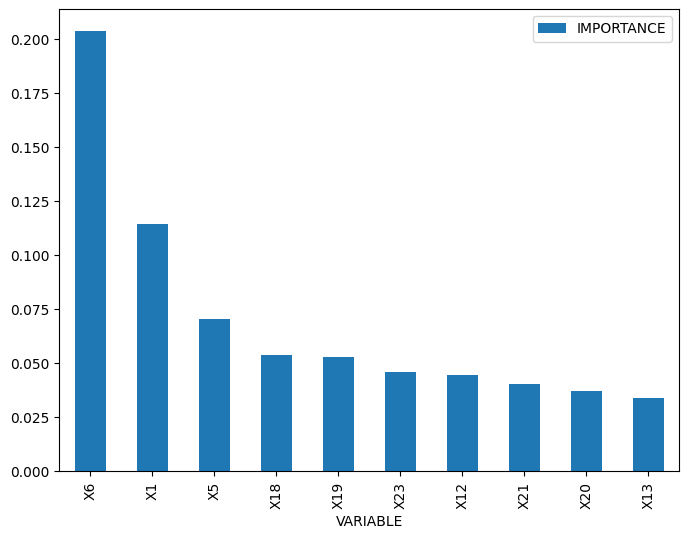

In [25]:
# Plot the top 10 feature importances as a bar chart
# The plot will have a size of 8x6 inches
var_importance[:10].plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()


## --- End of Classification 1 ---
## --- Start of Classification 2 ---

## Step 1: Problem Definition — Business Perspective

In this project, I focused on a critical challenge in the banking sector: **customer acquisition through direct marketing**, specifically promoting term deposits.

Term deposits represent a significant source of income for banks. These are fixed-term investments where customers agree to lock in a sum of money for a set period in exchange for a guaranteed return. To promote these financial products, banks run outreach campaigns through digital marketing channels such as emails, advertisements, social media, and phone calls.

While digital marketing can be incredibly effective, it also demands **substantial investment** in terms of time, effort, and resources. That’s why it’s essential to identify, in advance, which customers are most likely to convert — so that marketing efforts can be targeted more efficiently and cost-effectively.

The dataset I used in this project comes from a Portuguese banking institution and contains detailed records of their **direct marketing campaigns**. My goal was to develop a classification model to predict whether a customer will subscribe to a term deposit (represented by the target variable `y`).

This work draws inspiration from two research articles provided in our course materials:
- **S. Moro, R. Laureano, and P. Cortez**, “Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology”
- Published in **P. Novais et al., Proceedings of the European Simulation and Modelling Conference**

These studies provide valuable context for understanding the application of machine learning in real-world marketing strategy. This project not only reinforced my technical skills but also deepened my understanding of how data-driven models can drive smarter business decisions in the financial services industry.



# <font color='navy'>Step 2 Data Collection:</font>

* We get the data from Kaggle directory.
* The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The dataset contains 45,211 rows and 18 columns.

In [26]:
import pandas as pd

# Using the direct link to the file

# Read the CSV file using Pandas (pd)
url = 'https://drive.google.com/file/d/1zUarGflaS9Abus0bmPW_qmaQ2V5lM4NX/view?usp=sharing'

# Extracting the file ID from the URL
file_id = url.split('/')[-2]

# Constructing the download link for the file
download_link = 'https://drive.google.com/uc?export=download&id=' + file_id

# Reading the CSV file from the provided link
data = pd.read_csv(download_link, sep = ';')


#READ BELOW COMMENT CAREFULLY
# Use the below code only if you reach download limit on G-Drive
#data = pd.read_csv('https://raw.githubusercontent.com/marineevy/datasets/main/bank_marketing.csv', sep = ';')

# Use the below code only if you cannot load the data using previous two methods
#data = pd.read_csv('/content/bank_marketing.csv', sep = ';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
data.columns # recall that y represents whether the client will subscribe to a term deposit (variable y).
# this is similar to the client opening a savings account and putting money in it

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [28]:
# Define the input and output variables
y = data['y'].copy()
X = data.drop(['y'], axis = 1)

In [29]:
# let's check if there are any null values in the output variable
# if we do have some,  we need to remove them using the below code
# dataset = dataset.drop(dataset.loc[dataset[output_var].isnull(),:].index, axis = 0)
# if there are missing values in the input variables, instead of removing them we can replace them.

# below shows that there is no missing data in the output var, which is great.
y.isnull().sum()

np.int64(0)

* Recall in the data collection step, we mentioned that We always need two datasets in predictive modeling: Training and Testing Data.
* The training dataset is used to build the model (i.e., computing the betas). The model learns patterns and relationships from this data to make future predictions.
* The testing dataset is used to evaluate the performance of the built model. In other words, the test dataset is our “pretend future” dataset. Because we will use our model on future observations to make predictions, we need to test how our model will perform on a dataset that has not seen before.
* Basically, we want to see if the model is good to be used for making future predictions through test dataset.

* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [30]:
# Define a list to store the names of columns to be removed
col_names = []

# Iterate through each column in the features DataFrame
for i in X.columns:
    # Check if more than 70% of the values in the column are NaN
    if X[i].isna().sum() / len(X) > 0.7:
        # Append the column name to the list of columns to be removed
        col_names.append(i)
        # Drop the column from the features DataFrame
        X = X.drop(i, axis=1)

# Print the names of the columns that were removed
col_names


[]

In [31]:
# Train and Test Split

# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Display the first few rows of the training features DataFrame
X_train.head()

# Uncomment the line below to display the first few rows of the training target values DataFrame
# y_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
41031,29,housemaid,single,tertiary,no,453,no,no,cellular,13,aug,126,2,-1,0,unknown
41950,55,services,married,secondary,no,0,no,no,cellular,22,oct,102,1,106,1,failure
39883,56,services,divorced,secondary,no,935,no,no,cellular,2,jun,136,1,96,3,failure
44938,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,541,1,204,3,failure
42103,39,technician,married,tertiary,no,508,no,no,cellular,2,nov,154,3,-1,0,unknown


# <font color='navy'>Step 3 Data Processing</font>


## <font color='maroon'>Step 3.1 Data processing: data cleaning - identify and deal with missing data</font>

In [32]:
numerical_cols = list(set(X_train.select_dtypes(exclude = object).columns)) # Your code goes in here
categorical_cols = list(set(X_train.select_dtypes(include = object).columns)) # Your code goes in here

In [33]:
# Run this cell. It will display the results of your code
# Do not change this cell.
print(numerical_cols)
print(categorical_cols)

['age', 'day', 'previous', 'duration', 'balance', 'pdays', 'campaign']
['loan', 'education', 'housing', 'poutcome', 'default', 'job', 'marital', 'contact', 'month']


In [34]:
# Import the nan constant from the math module
from math import nan

# Import the SimpleImputer class from scikit-learn's impute module
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object for imputing missing numerical values with the mean of the column
num_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Create a SimpleImputer object for imputing missing categorical values with the most frequent value of the column
cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")


# Fit the numerical imputer on the training data for numerical columns
# This calculates the mean of each numerical column in the training set
num_imputer.fit(X_train[numerical_cols])

# Fit the categorical imputer on the training data for categorical columns
# This calculates the most frequent value of each categorical column in the training set
cat_imputer.fit(X_train[categorical_cols])

# Transform the numerical columns in the training data by replacing missing values with the calculated means
X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])

# Transform the categorical columns in the training data by replacing missing values with the most frequent values
X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])


# Transform the numerical columns in the testing data by replacing missing values with the calculated means
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# Transform the categorical columns in the testing data by replacing missing values with the most frequent values
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

## <font color='maroon'>Step 3.2 Data processing: scale data data</font>

In [35]:
# Select the numerical columns (columns of type int64 and float64) from the training data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
numerical_cols

# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object for standardizing numerical features
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training data
# This calculates the mean and standard deviation for each numerical column in the training set
scaler.fit(X_train[numerical_cols])

# Transform the numerical columns in the training data by standardizing them
# This scales the numerical features so that they have a mean of 0 and a standard deviation of 1
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])


X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## <font color='maroon'>Step 3.3 Data processing: Encode categorical variables</font>
* Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.

In [36]:
# Import the OneHotEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns (columns of type object) from the training data
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
categorical_cols

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical variables in the training data
enc.fit(X_train[categorical_cols])

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(X_train[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from the training data to avoid redundancy
X_train.drop(categorical_cols, axis=1, inplace=True)

# Reset the index of the training data to ensure proper alignment when concatenating
X_train.reset_index(drop=True, inplace=True)

# Concatenate the original training data with the new 'dummies' DataFrame along columns (axis=1)
X_train = pd.concat([X_train, dummies], axis=1)

# Display the first two rows of the modified training data to verify changes
X_train.head(2)


# Encode cat variables in the x_test set
dummies = pd.DataFrame(enc.transform(X_test[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())
X_test.drop(categorical_cols, axis=1, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, dummies], axis=1)

## <font color='maroon'>Step 3.4 Data preprocessing: Make output variable binary</font>

In [37]:
# encode the y variable as 0 and 1 so they will be numbers not yes and no
y_train[y_train == 'no'] = 0
y_train[y_train == 'yes'] = 1
y_train = y_train.astype(int) # make sure you set the y variable as int sometimes the variable type can stay as object depite being encoded as o and 1
y_test[y_test== 'no'] = 0
y_test[y_test == 'yes'] = 1
y_test = y_test.astype(int)

In [38]:
# Let's check if the dataset is balanced
# as seen here the dataset is not balanced (there are many more instances where y is zero as compared to 1)
# we will need to balance it in the preprocessing stage.
y_train.value_counts()

,count
y,
0,26747
1,3544


## <font color='maroon'>Step 3.5 Data processing: Data balancing</font>

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
cols = X_train.columns
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns = cols)
y_train = pd.DataFrame(y_train, columns = ['y'])

In [40]:
# Let's check if the dataset is balanced
# as seen here the dataset is not balanced (there are many more instances where y is zero as compared to 1)
# we will need to balance it in the preprocessing stage.
y_train.value_counts()

,count
y,
0,26747
1,26747


# <font color='navy'>Step 4 EDA and Data Visualization:</font>


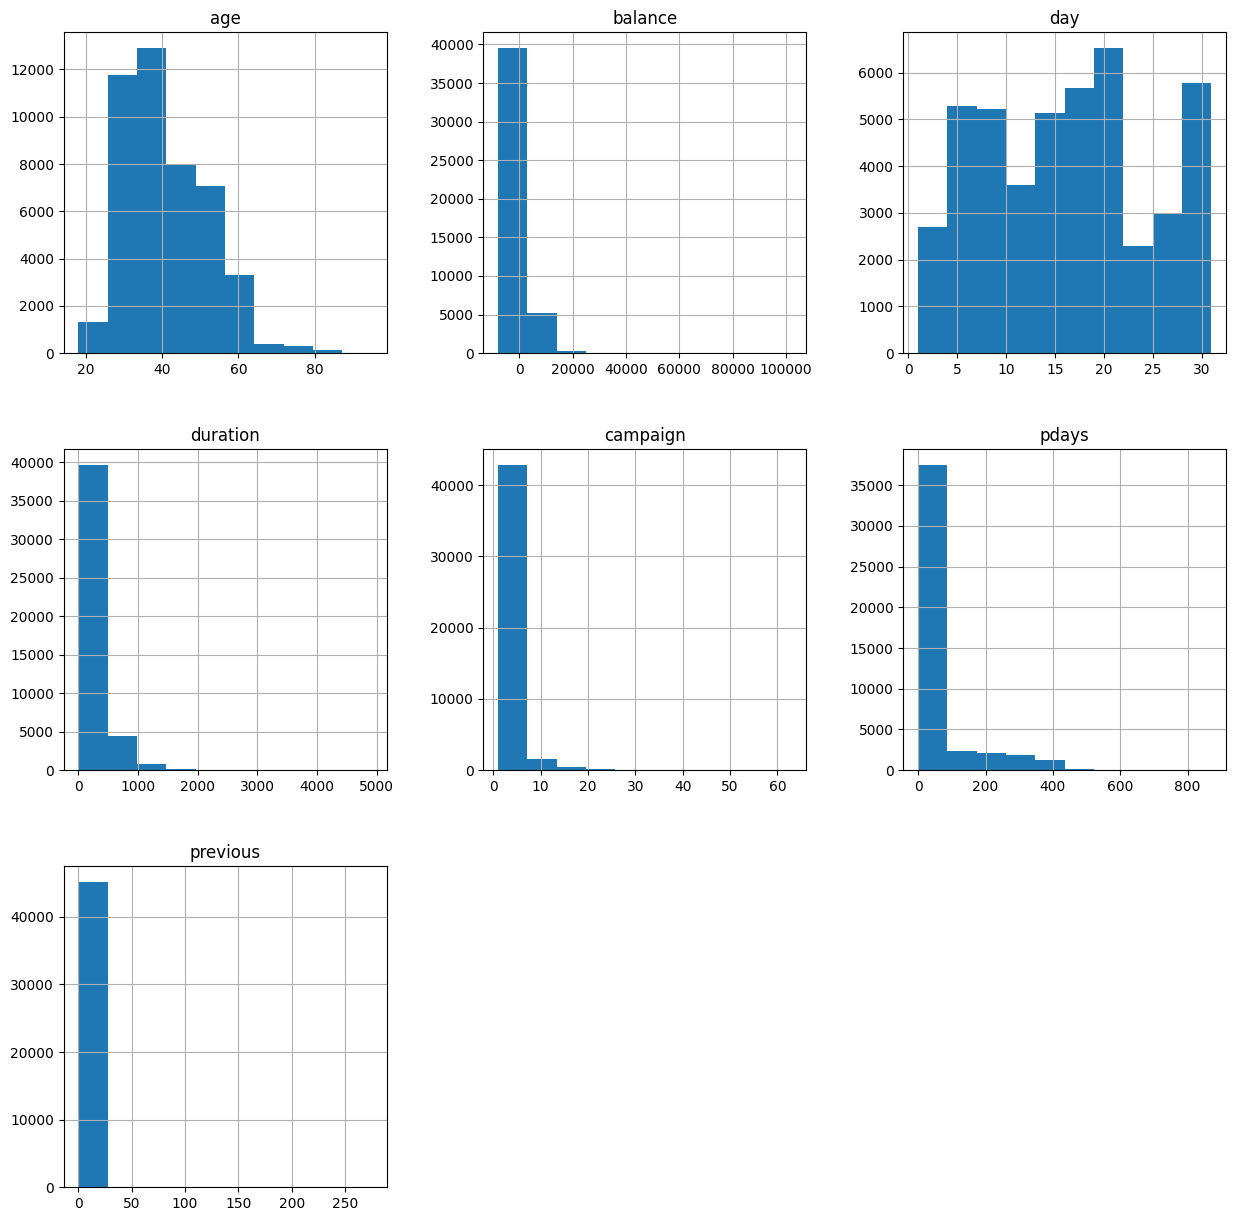

In [41]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(15,15))
plt.show()

# <font color='navy'>Step 5 - Model Building and Predicting Output Variable on Test Data </font>

In [42]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.124129,-0.304271,-0.339305,-0.509796,-0.243598,-0.410463,-0.305940,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
1,1.322766,-0.457537,0.742844,-0.602681,-0.561829,0.653121,0.225042,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0
2,1.416877,-0.141192,-1.661932,-0.471094,-0.561829,0.553721,1.287006,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
3,0.569875,0.635967,-1.180977,1.096341,-0.561829,1.627246,1.287006,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0
4,-0.183015,-0.285662,-1.661932,-0.401430,0.074633,-0.410463,-0.305940,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53489,-0.184406,0.381157,-1.420271,1.775971,0.073066,2.210038,0.753410,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.995076,0.0,0.004924,0.0
53490,0.120045,0.345782,-0.955171,1.902334,-0.561829,-0.410463,-0.305940,0.0,1.0,0.0,...,0.0,0.0,0.877977,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
53491,-0.907372,-0.385091,-0.459544,-0.260501,-0.561829,0.633241,0.225042,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
53492,2.431069,0.502864,-1.600538,-0.259376,-0.561829,0.617172,0.756024,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.755304,0.0,0.244696,0.0


In [43]:
# Building the Model

# Import the datasets and linear_model modules from scikit-learn
from sklearn import datasets
from sklearn import linear_model

# Create a linear regression object
log_reg = linear_model.LogisticRegression()

# Train the linear regression model using the training data
# The fit method is used to train the linear regression model with the training features (X_train) and target values (y_train)
log_reg.fit(X_train, y_train.values[:,0])
# log_reg.fit(X_train, y_train)

print('logistic regression accuracy: ', log_reg.score(X_train, y_train))


logistic regression accuracy:  0.8480016450443041


In [44]:
# Let's print the coefs
print('coeffcients', log_reg.coef_)

coeffcients [[-0.01272319  0.01327387  0.02653411  1.61495635 -0.41140514  0.02786009
   0.0739679   0.27423466 -0.04841786 -0.29074304 -0.43088812  0.09079678
   0.65409339 -0.27050396 -0.14002668  0.80085557  0.02332035 -0.18644315
  -0.69150682 -0.1256053  -0.19515765  0.10553408 -0.34998755  0.09891549
   0.28220714 -0.24636395  0.1052517  -0.32048057  0.35205312 -0.56728199
   0.27133744 -0.48656631  0.61027285  0.50067771 -1.32617943  0.13089057
  -1.00639933  0.57827679 -0.19933128 -1.60223627 -1.17438827  0.26209555
   1.94016889 -0.66182205 -0.99793992  1.47467314  1.0407833  -0.76947041
  -0.76328194  2.01745943 -0.69993595]]


In [45]:
# Create the predictioms dataframe for the test case
predictions = pd.DataFrame(log_reg.predict_proba(X_test)[:, 1], columns = ['preds_prob'])
predictions['preds'] = log_reg.predict(X_test)
predictions['actual'] = y_test.values
predictions

,preds_prob,preds,actual
0,0.030304,0,0
1,0.095997,0,0
2,0.698416,1,0
3,0.784617,1,0
4,0.105515,0,0
...,...,...,...
14915,0.120499,0,0
14916,0.019630,0,0
14917,0.224636,0,0
14918,0.748527,1,0


In [46]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cm = confusion_matrix(predictions['preds'], predictions['actual'])

In [47]:
# Import necessary module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.85
Sensitivity: 0.81
Specificity: 0.85
Precision: 0.42


* Let's compute the performance metrics, such as sensitivity specificity, AUC, etc.
* Let's get started

In [48]:
from sklearn.metrics import mean_squared_error as MSE, accuracy_score, roc_auc_score, confusion_matrix, roc_curve

# Function to convert probabilities to binary class labels based on a threshold of 0.5
def get_binary_class(X):
    class_list = X.copy()  # Make a copy of the input array
    for i in range(len(X)):
        if X[i] > 0.5:  # If the probability is greater than 0.5, classify as 1 (positive class)
            class_list[i] = 1
        else:  # Otherwise, classify as 0 (negative class)
            class_list[i] = 0
    return class_list  # Return the binary class labels

# Function to calculate various performance measures for binary classification
def perf_measures(actual, pred):
    # Calculate the confusion matrix and extract the true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = confusion_matrix(actual, get_binary_class(pred)).ravel()

    # Calculate sensitivity (recall) as the proportion of actual positives correctly identified
    sensitivity = tp / (tp + fn)

    # Calculate specificity as the proportion of actual negatives correctly identified
    specificity = tn / (tn + fp)

    # Calculate accuracy as the proportion of all correct predictions
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate precision as the proportion of positive predictions that are actually positive
    precision = tp / (tp + fp)

    # Calculate F-measure (F1 score) as the harmonic mean of precision and recall
    f_measure = tp / (tp + 0.5 * (fp + fn))

    # Calculate Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
    auc = roc_auc_score(actual, get_binary_class(pred))

    # Return the calculated performance measures
    return [auc, accuracy, sensitivity, specificity, precision, f_measure]


In [49]:
# Calculate performance measures for the given actual and predicted probabilities
auc, accuracy, sensitivity, specificity, precision, f_measure = perf_measures(predictions['actual'], predictions['preds_prob'])

# Print the calculated performance measures
print(f'AUC: {auc}')          # Print the Area Under the ROC Curve (AUC) score
print(f'Accuracy: {accuracy}')  # Print the accuracy score
print(f'Sensitivity: {sensitivity}')  # Print the sensitivity (recall) score
print(f'Specificity: {specificity}')  # Print the specificity score
print(f'Precision: {precision}')  # Print the precision score
print(f'F-Measure: {f_measure}')  # Print the F-measure (F1 score)

AUC: 0.8314782816722215
Accuracy: 0.8472520107238606
Sensitivity: 0.8108882521489972
Specificity: 0.8520683111954459
Precision: 0.42063020214030916
F-Measure: 0.5539244470542181


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the ROC curve for a given model
def get_roc_curve(y_test, y_score, model_name):
    # Calculate the AUC-ROC score
    roc_auc = roc_auc_score(y_test, get_binary_class(y_score))

    # Calculate the false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Define the label for the plot including the model name and AUC score
    label = model_name + ' AUC %0.3f'

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=label % roc_auc)

    # Plot a diagonal line representing a random classifier
    plt.plot([0, 1], [0, 1], 'r--')

    # Set the x-axis limits
    plt.xlim([0.0, 1.0])

    # Set the y-axis limits
    plt.ylim([0.0, 1.05])

    # Label the x-axis
    plt.xlabel('False Positive Rate')

    # Label the y-axis
    plt.ylabel('True Positive Rate')

    # Set the title of the plot
    plt.title(model_name + ' ROC')

    # Display the legend in the lower right corner
    plt.legend(loc="lower right")

    # Ensure a tight layout for the plot
    plt.tight_layout()


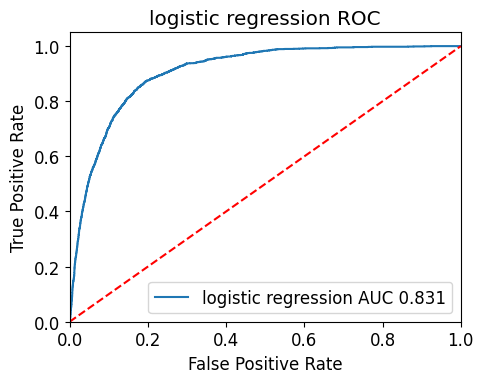

In [51]:
# Update the default font size for plots
plt.rcParams.update({'font.size': 12})

# Create a new figure with specified size
plt.figure(figsize=(5, 4))

# Call the function to plot the ROC curve for the logistic regression model
get_roc_curve(predictions['actual'], predictions['preds_prob'], 'logistic regression')


# <font color='navy'>Step 5 Model Building - Decision Tree Classifier:</font>

In [52]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Classifier object
clf_tree = tree.DecisionTreeClassifier()  # tree.DecisionTreeRegressor(max_depth=20)

# Train the decision tree classifier using the training data
clf_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = clf_tree.predict(X_train)

# Make predictions on the test data
pred_test = clf_tree.predict(X_test)

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.87
Sensitivity: 0.55
Specificity: 0.92
Precision: 0.47


In [53]:
# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Create a DataFrame for the feature importances calculated by the decision tree classifier
# The DataFrame will have two columns: 'IMPORTANCE' and 'VARIABLE'
# 'IMPORTANCE' will contain the importance scores
# 'VARIABLE' will contain the corresponding feature names from the training data
var_importance = pd.DataFrame(clf_tree.feature_importances_, columns=['IMPORTANCE'])
var_importance['VARIABLE'] = X_train.columns

# Sort the DataFrame by the importance scores in descending order
var_importance.sort_values(by='IMPORTANCE', ascending=False, inplace=True)

# Set the index of the DataFrame to the feature names for easier visualization
var_importance.index = var_importance['VARIABLE']

# Display the first few rows of the variable importance DataFrame to verify the feature importances
var_importance.head()


,IMPORTANCE,VARIABLE
VARIABLE,,
duration,0.357027,duration
day,0.064962,day
contact_unknown,0.063254,contact_unknown
poutcome_success,0.061056,poutcome_success
campaign,0.047519,campaign


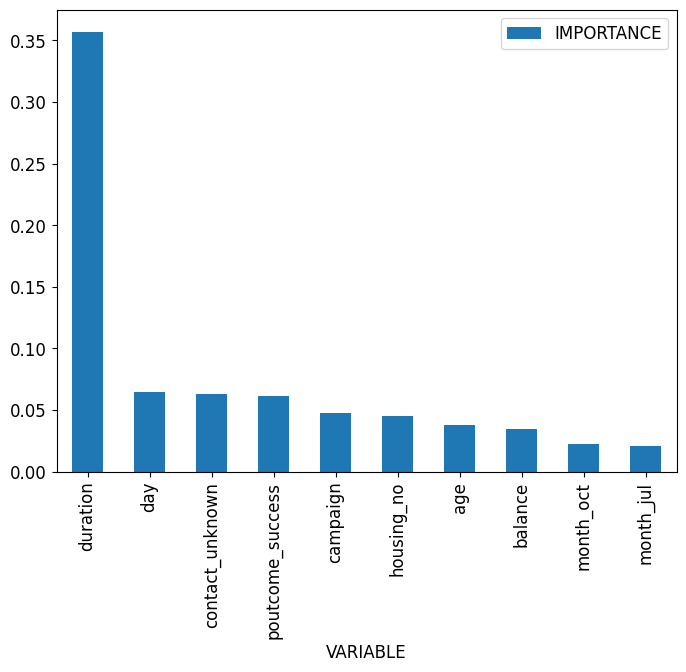

In [54]:
# Plot the top 10 feature importances as a bar chart
# The plot will have a size of 8x6 inches
var_importance[:10].plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()